### 嘗試對因子做進出場

In [1]:
from operators import *
from backtest import *
import pandas as pd
import numpy as np
import os
from typing import Iterable
# import alphalens as als
import quantstats as qs
import matplotlib.pyplot as plt
import pickle
from functools import reduce
# extend pandas functionality with metrics, etc.
# qs.extend_pandas()

target_folder_path = rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2'
%cd "{target_folder_path}"

/Users/tedting/Documents/Alpha/OFFICIAL_data_2


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
target_folder_path = rf'/Users/tedting/Documents/Alpha/data'
adj_open = pd.read_pickle(rf'{target_folder_path}/adj_open.pkl')
exp_returns = adj_open.pct_change().shift(-2)

Close = pd.read_pickle(rf'{target_folder_path}/收盤價(元).pkl')
Volume = pd.read_pickle(rf'{target_folder_path}/成交量(千股).pkl')
Limit = pd.read_pickle(rf'{target_folder_path}/limit.pkl')

ZTXA = pd.read_pickle(rf'{target_folder_path}/ZTXA_close.pkl')
Benchmark = ZTXA['ZTXA 台指近月期貨指數'].pct_change().shift(-2)

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_17993/1211691609.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  exp_returns = adj_open.pct_change().shift(-2)


In [3]:
ZTXA

symbol,ZTXA 台指近月期貨指數
date,
1998-07-21,8045
1998-07-22,7870
1998-07-23,7825
1998-07-24,7835
1998-07-27,7786
...,...
2023-11-24,17293
2023-11-27,17173
2023-11-28,17364


In [6]:
target_folder_path = rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2'
W_GrossProfitGrowthRate = pd.read_pickle(rf'{target_folder_path}/W_GrossProfitGrowthRate.pkl')
W_REV_G_m = pd.read_pickle(rf'{target_folder_path}/W_REV_G_m.pkl')

W_S_REV_G_m = pd.read_pickle(rf'{target_folder_path}/W_S_REV_G_m.pkl')
W_S_GrossProfitGrowthRate = pd.read_pickle(rf'{target_folder_path}/W_S_GrossProfitGrowthRate.pkl')

In [7]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
heavy_Filter = Close_y_avg < 1000 
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 60000
small_aum_Filter = Volume_Filter & trade_volume_Filter
small_aum_Filter2 = Volume_Filter & trade_volume_Filter & heavy_Filter # & Limit

### 模擬實倉(Long_Position)

In [8]:
dfs = [#W_RevenueGrowthRate,
       #W_OperatingProfit,
       #W_ROE_A_AfterTax,
       #W_NetProfitMargin_AfterTax,
       #W_GrossProfitMargin,
       W_GrossProfitGrowthRate,
       #W_OperatingProfitGrowthRate,
       #W_REV_m,
       W_REV_G_m,
       #W_REV_pers_m
       ]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)
result_df = result_df[small_aum_Filter2]

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_10356/560572468.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)


Error at index 2013-01-02 00:00:00: value is 0.0
Error at index 2013-01-03 00:00:00: value is 0.0
Error at index 2013-01-04 00:00:00: value is 0.0
Error at index 2013-01-07 00:00:00: value is 0.0
Error at index 2013-01-08 00:00:00: value is 0.0
Error at index 2013-01-09 00:00:00: value is 0.0
Error at index 2013-01-10 00:00:00: value is 0.0
Error at index 2013-01-11 00:00:00: value is 0.0
Error at index 2013-01-14 00:00:00: value is 0.0
Error at index 2013-01-15 00:00:00: value is 0.0
Error at index 2013-01-16 00:00:00: value is 0.0
Error at index 2013-01-17 00:00:00: value is 0.0
Error at index 2013-01-18 00:00:00: value is 0.0
Error at index 2013-01-21 00:00:00: value is 0.0
Error at index 2013-01-22 00:00:00: value is 0.0
Error at index 2013-01-23 00:00:00: value is 0.0
Error at index 2013-01-24 00:00:00: value is 0.0
Error at index 2013-01-25 00:00:00: value is 0.0
Error at index 2013-01-28 00:00:00: value is 0.0
Error at index 2013-01-29 00:00:00: value is 0.0
Error at index 2013-

/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2014-05-09  2014-05-09
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          1,339.46%   96.98%
CAGR﹪                     32.15%      7.34%

Sharpe                     1.15        0.52
Prob. Sharpe Ratio         99.97%      94.24%
Smart Sharpe               1.05        0.48
Sortino                    1.61        0.72
Smart Sortino              1.48        0.66
Sortino/√2                 1.14        0.51
Smart Sortino/√2           1.04        0.47
Omega                      1.22        1.22

Max Drawdown               -35.13%     -31.51%
Longest DD Days            325         748
Volatility (ann.)          28.59%      16.61%
R^2                        0.08        0.08
Information Ratio          0.05        0.05
Calmar                     0.92        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-06-11,2018-10-09,2019-04-12,305,-35.133471,-33.375543
2,2020-03-04,2020-03-19,2020-05-20,77,-31.831814,-30.062772
3,2015-07-02,2015-08-21,2016-02-19,232,-30.819107,-24.530666
4,2022-03-28,2022-06-30,2023-02-16,325,-25.197008,-22.734020
5,2014-07-24,2014-10-24,2015-05-22,302,-21.610364,-20.678945


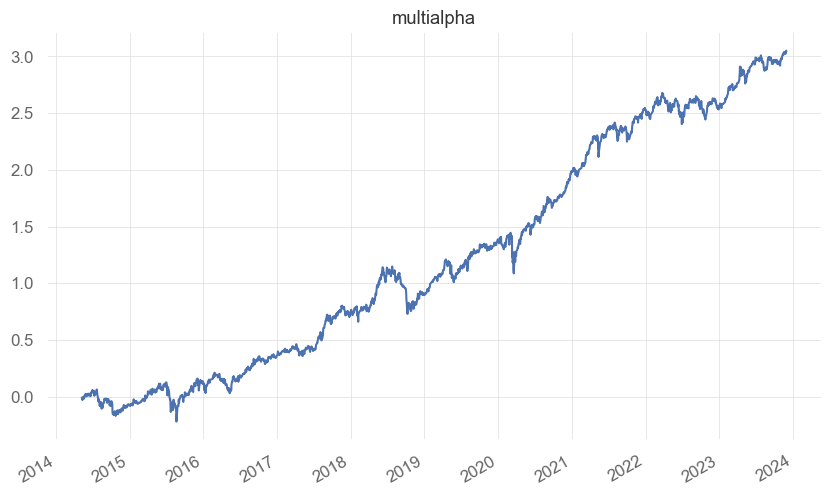

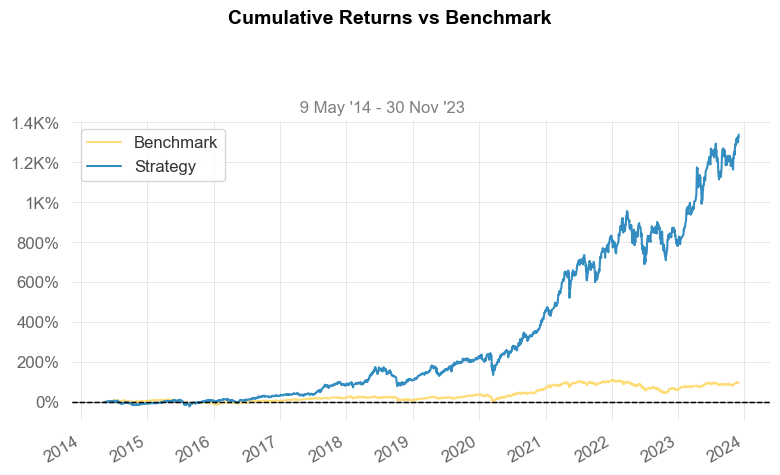

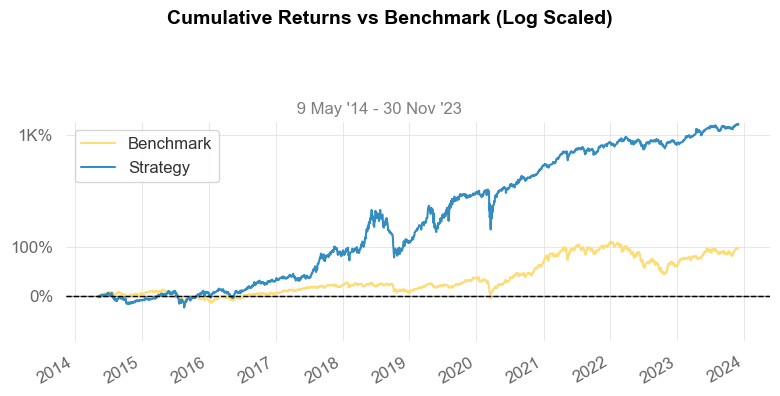

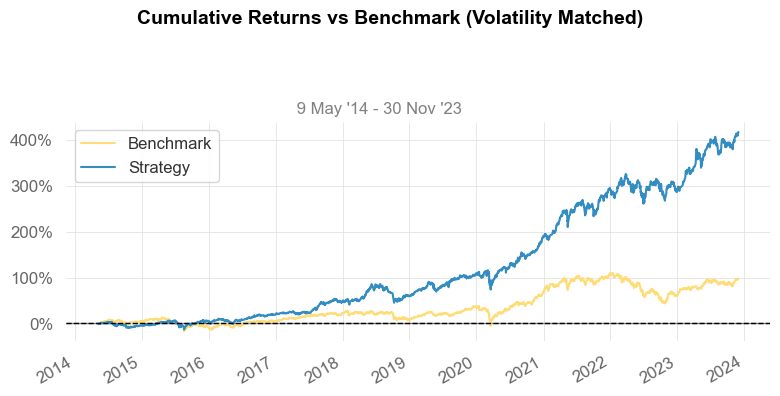

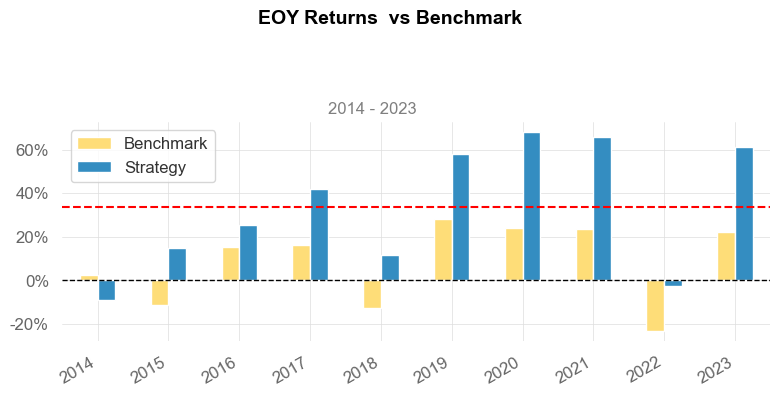

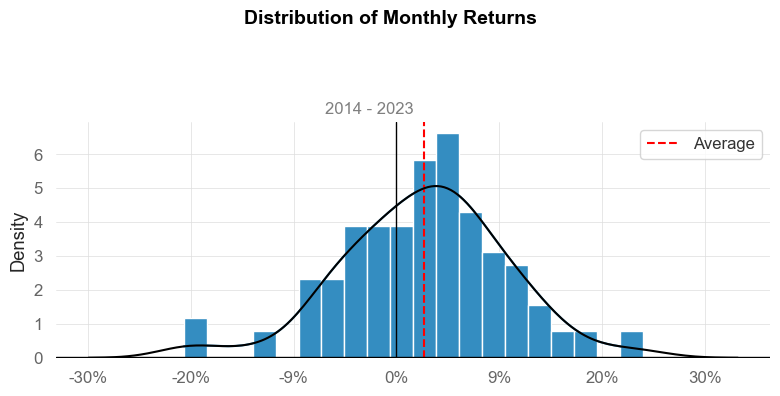

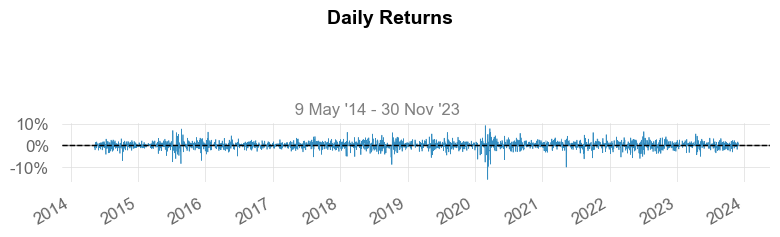

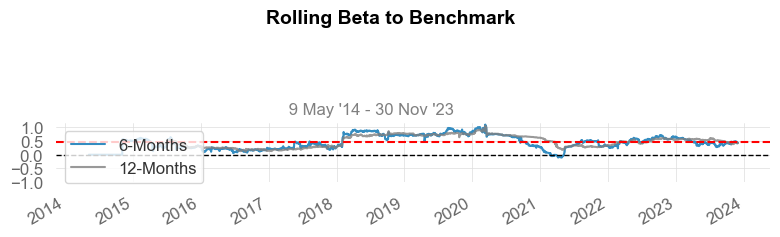

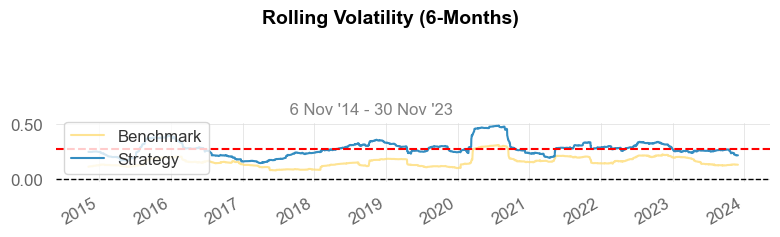

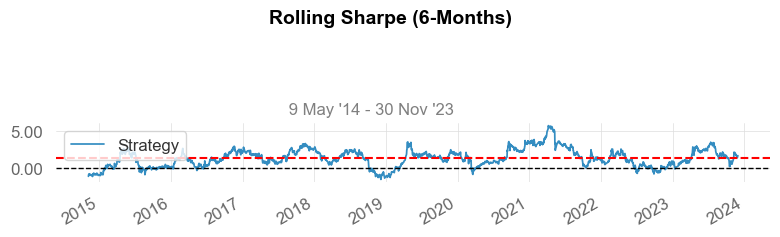

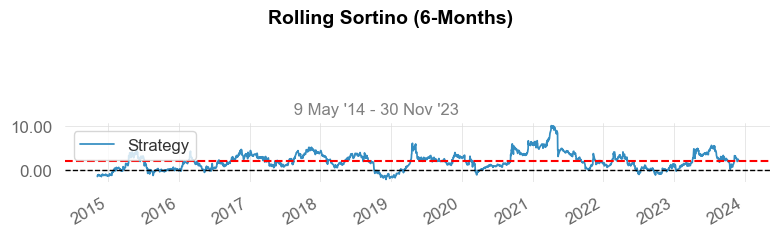

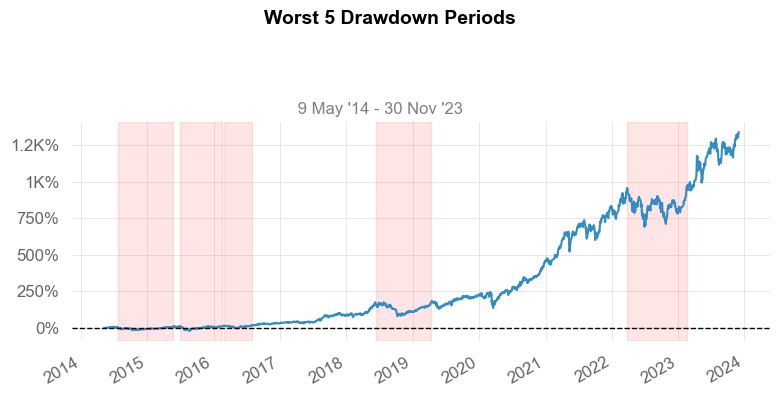

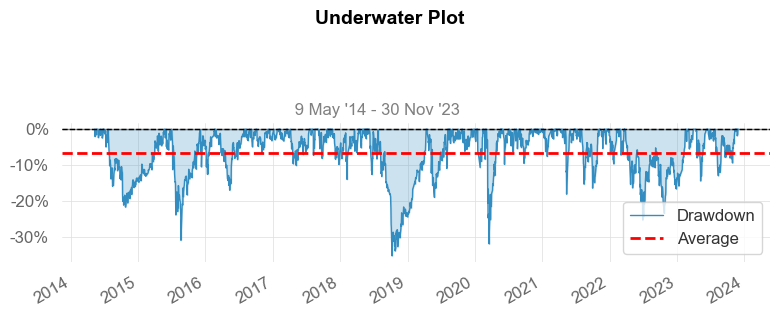

TypeError: pivot() takes 1 positional argument but 4 were given

In [77]:
stocks = 10
top = result_df.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2014-05-09' # '2014-05-09'
end_time = '2023-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns = daily_profit - daily_fee

daily_returns.cumsum().plot(title = 'multialpha')

qs.reports.full(daily_returns,Benchmark)


In [70]:
# stocks = 10
# top = result_df.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)

# Assuming 'filter_sign' is a DataFrame where you want to apply the logic
top_equalweight = filter_sign.apply(lambda row: [1/row.sum() if x else 0 for x in row], axis=1)
#top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis=1)
for index, value in test.items():
    if (0.001 < value < 0.975) or (-0.001 > value > -0.975):
        print(f"Error at index {index}: value is {value}")

buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2014-03-01' 
end_time = '2023-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns_L = daily_profit - daily_fee

daily_returns_L.cumsum().plot(title = 'multialpha_L')

qs.reports.full(daily_returns_L,Benchmark)

ValueError: No axis named 1 for object type Series

### 模擬實倉(Short_Position)

In [10]:
dfs = [#W_RevenueGrowthRate,
       #W_OperatingProfit,
       #W_ROE_A_AfterTax,
       #W_NetProfitMargin_AfterTax,
       #W_GrossProfitMargin,
       W_S_GrossProfitGrowthRate,
       #W_OperatingProfitGrowthRate,
       #W_REV_m,
       W_S_REV_G_m,
       #W_REV_pers_m
       ]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)
result_df

symbol,1101,1102,1210,1216,1301,1303,1312,1314,1319,1326,...,8299,8358,8436,8454,9904,9914,9938,9939,9945,9958
2013-01-02,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-03,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-04,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-07,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-08,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.0,-0.005521,0.0,0.0,0.0,0.0,0.0,0.0,-0.010428,0.0,...,0.0,0.0,0.0,-0.020756,0.0,0.0,0.0,0.0,-0.020756,0.0
2023-11-28,0.0,-0.005635,0.0,0.0,0.0,0.0,0.0,0.0,-0.010410,0.0,...,0.0,0.0,0.0,-0.020779,0.0,0.0,0.0,0.0,-0.020779,0.0
2023-11-29,0.0,-0.005749,0.0,0.0,0.0,0.0,0.0,0.0,-0.010389,0.0,...,0.0,0.0,0.0,-0.020796,0.0,0.0,0.0,0.0,-0.020796,0.0
2023-11-30,0.0,-0.005829,0.0,0.0,0.0,0.0,0.0,0.0,-0.010364,0.0,...,0.0,0.0,0.0,-0.020813,0.0,0.0,0.0,0.0,-0.020813,0.0


In [11]:
stocks = 10
result_df = result_df[small_aum_Filter2]
top = result_df.apply(lambda row: row.nsmallest(stocks), axis=1)#.fillna(0)
df_cleaned = top.loc['2023-11-25':'2023-11-30'].dropna(axis=1, how='all')
df_cleaned

symbol,2308,2356,2360,2474,3532,5483,6182,6245,6488,8069
2023-11-27,-0.040351,-0.041524,-0.040351,-0.044037,-0.044037,-0.040853,-0.044037,-0.044037,-0.044037,-0.044037
2023-11-28,-0.040377,-0.041555,-0.040377,-0.044079,-0.044079,-0.040882,-0.044079,-0.044079,-0.044079,-0.044079
2023-11-29,-0.040398,-0.041581,-0.040398,-0.044115,-0.044115,-0.040905,-0.044115,-0.044115,-0.044115,-0.044115
2023-11-30,-0.040445,-0.041638,-0.040445,-0.044194,-0.044194,-0.040957,-0.044194,-0.044194,-0.044194,-0.044194


/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_4406/2932125316.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: -1/stocks if x != 0 else 0) # 取負號（空部位）


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-02  2013-01-02
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             90.0%       100.0%

Cumulative Return          -71.42%     123.73%
CAGR﹪                     -10.84%     7.66%

Sharpe                     -0.43       0.55
Prob. Sharpe Ratio         8.42%       96.22%
Smart Sharpe               -0.42       0.54
Sortino                    -0.63       0.76
Smart Sortino              -0.62       0.74
Sortino/√2                 -0.45       0.54
Smart Sortino/√2           -0.44       0.53
Omega                      0.92        0.92

Max Drawdown               -78.27%     -31.51%
Longest DD Days            3020        748
Volatility (ann.)          22.01%      16.11%
R^2                        0.1         0.1
Information Ratio          -0.04       -0.04
Calmar                     -0.14      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-08-24,2023-07-21,2023-11-30,3020,-78.270325,-77.225020
2,2014-10-15,2015-03-13,2015-07-22,280,-19.981672,-19.807269
3,2014-03-21,2014-07-22,2014-10-08,201,-15.185593,-14.939143
4,2015-08-04,2015-08-07,2015-08-20,16,-6.097852,-6.072114
5,2014-03-03,2014-03-14,2014-03-20,17,-4.408352,-3.865557


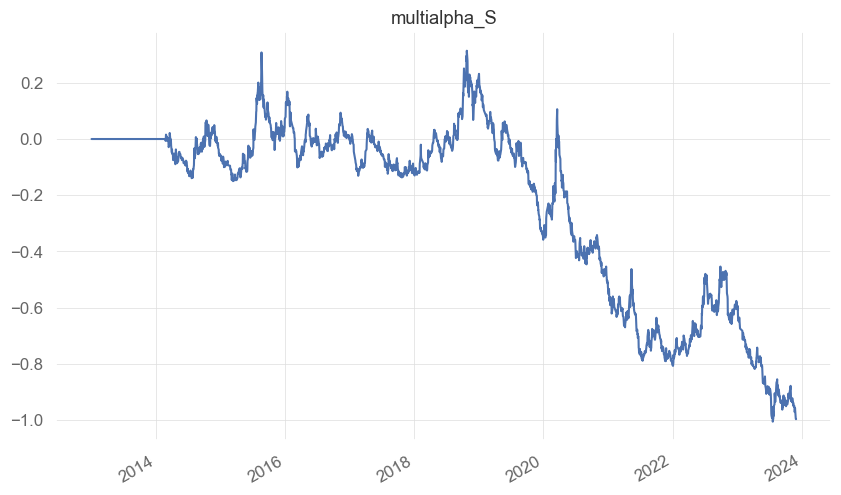

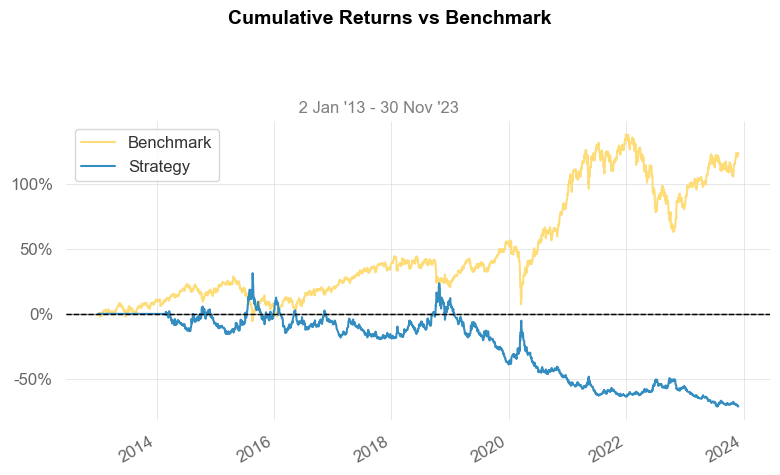

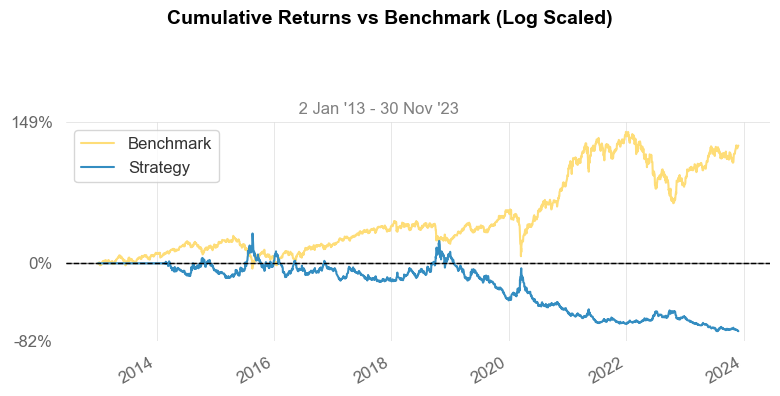

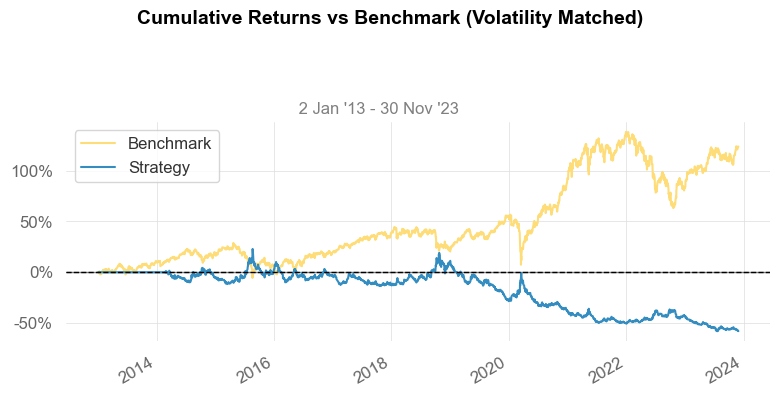

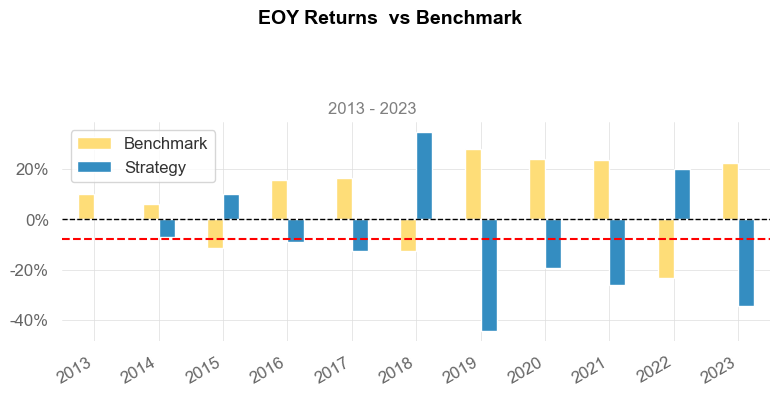

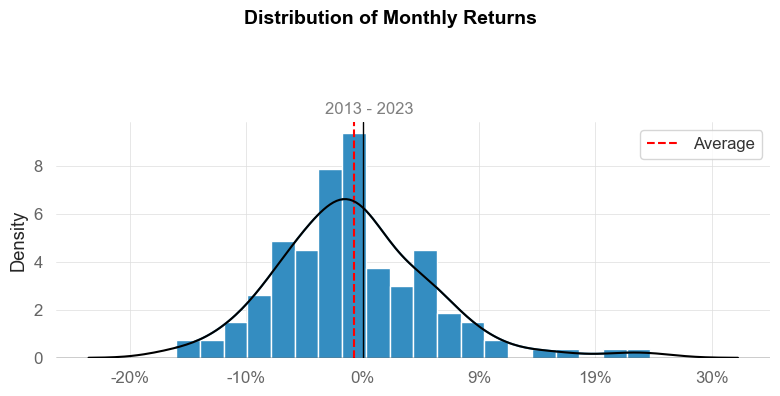

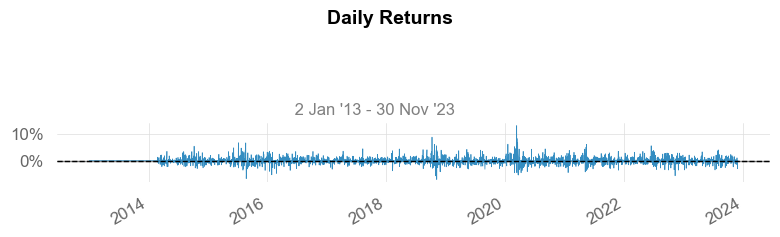

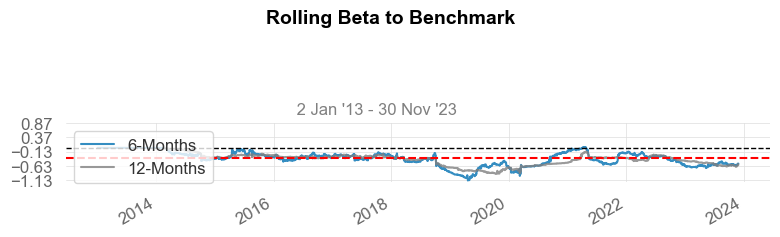

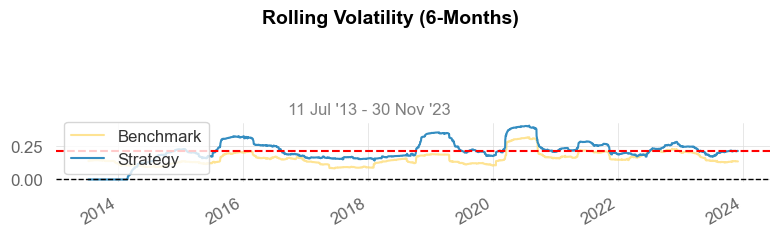

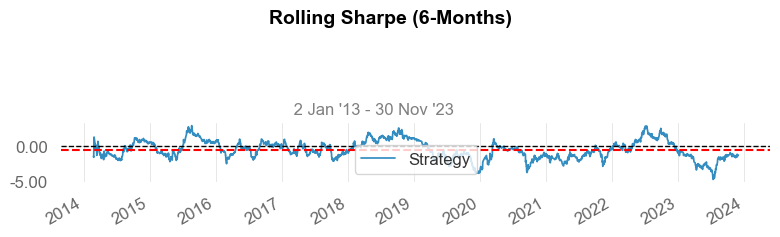

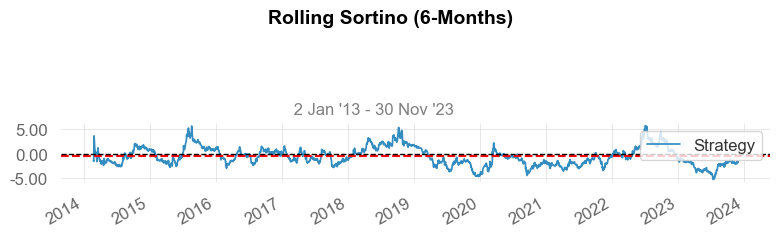

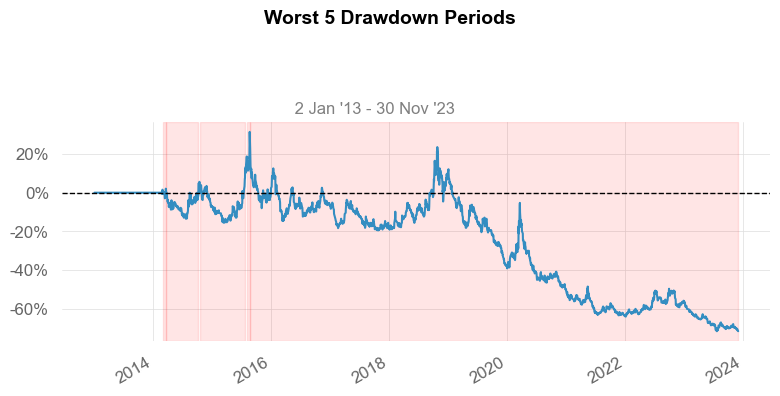

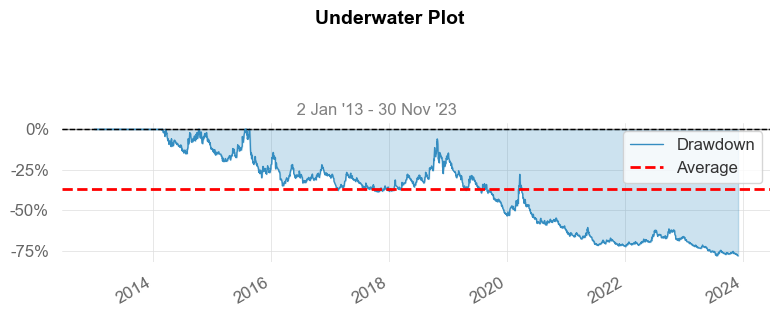

TypeError: pivot() takes 1 positional argument but 4 were given

In [12]:
stocks = 10
result_df = result_df[small_aum_Filter2]
top = result_df.apply(lambda row: row.nsmallest(stocks), axis=1).fillna(0) # 這邊是取最小的為Ｘ
top_equalweight = top.applymap(lambda x: -1/stocks if x != 0 else 0) # 取負號（空部位）
test = top_equalweight.sum(axis=1)
for index, value in test.items():
    if (0.001 < value < 0.975) or (-0.001 > value > -0.975):
        print(f"Error at index {index}: value is {value}")

buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2013-01-02' # '2014-05-09'
end_time = '2023-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns_S = daily_profit - daily_fee

daily_returns_S.cumsum().plot(title = 'multialpha_S')

qs.reports.full(daily_returns_S,Benchmark)

In [78]:
daily_returns

2014-05-09   -0.008529
2014-05-12   -0.020149
2014-05-13    0.006626
2014-05-14   -0.000357
2014-05-15    0.013908
                ...   
2023-11-24   -0.017997
2023-11-27    0.003677
2023-11-28    0.016348
2023-11-29   -0.000915
2023-11-30    0.009603
Length: 2342, dtype: float64

### 多空組合

Correlation: -0.722321950299898


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-02  2013-01-02
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             90.0%       100.0%

Cumulative Return          169.49%     123.73%
CAGR﹪                     9.51%       7.66%

Sharpe                     1.04        0.55
Prob. Sharpe Ratio         99.97%      96.22%
Smart Sharpe               1.03        0.54
Sortino                    1.55        0.76
Smart Sortino              1.53        0.75
Sortino/√2                 1.1         0.54
Smart Sortino/√2           1.08        0.53
Omega                      1.2         1.2

Max Drawdown               -11.31%     -31.51%
Longest DD Days            438         748
Volatility (ann.)          9.39%       16.11%
R^2                        0.0         0.0
Information Ratio          0.0         0.0
Calmar                     0.84        0.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-08-27,2019-12-20,2020-05-04,251,-11.305771,-11.024382
2,2022-10-06,2023-01-17,2023-04-18,194,-9.207277,-8.909205
3,2016-01-27,2016-03-29,2016-09-02,219,-8.515860,-8.425881
4,2021-05-11,2021-08-16,2022-02-07,272,-8.353933,-7.765082
5,2018-07-12,2018-11-29,2019-03-12,243,-8.133130,-7.431851


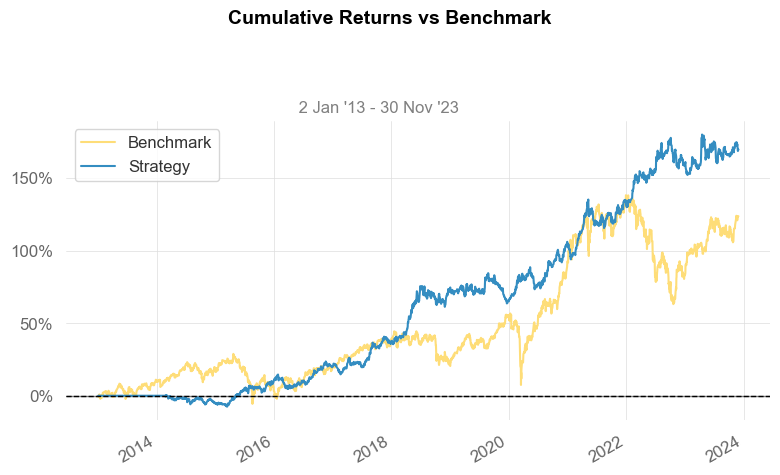

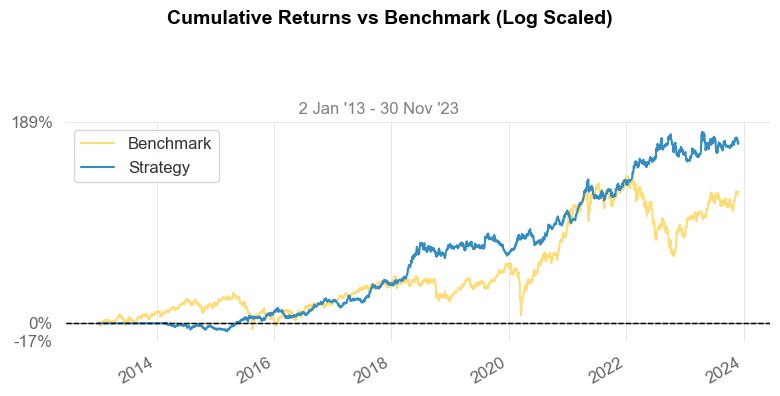

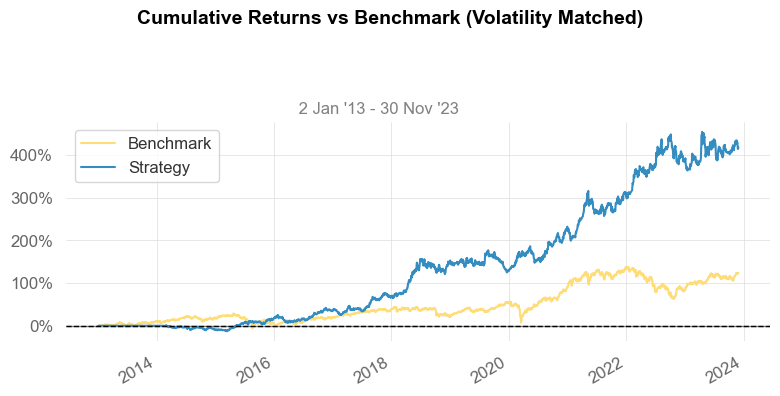

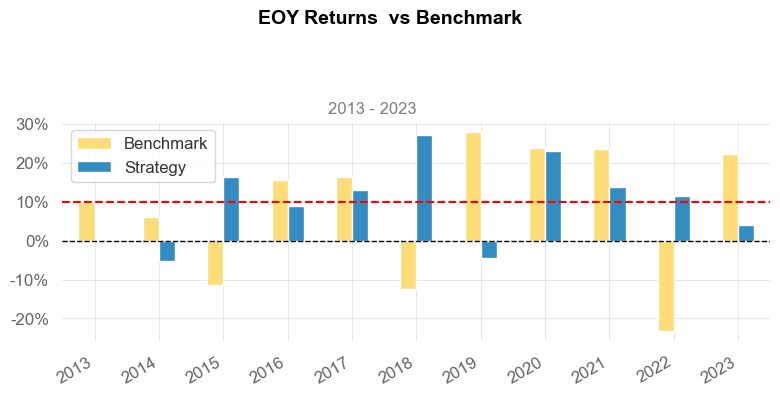

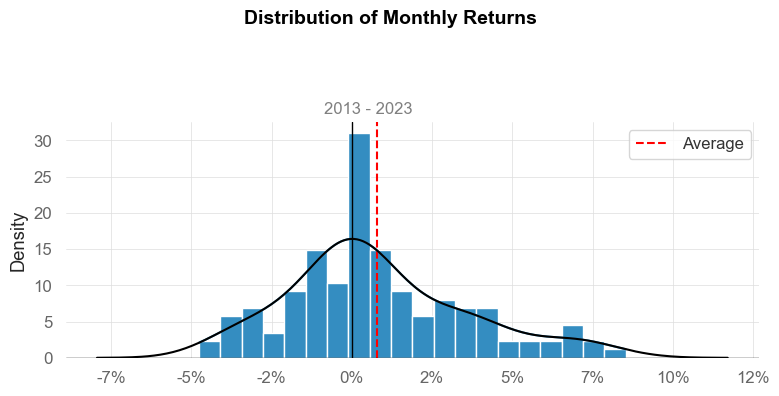

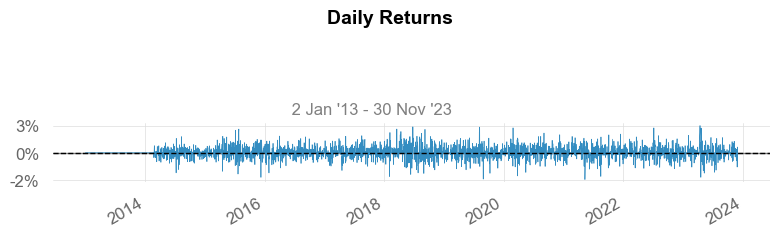

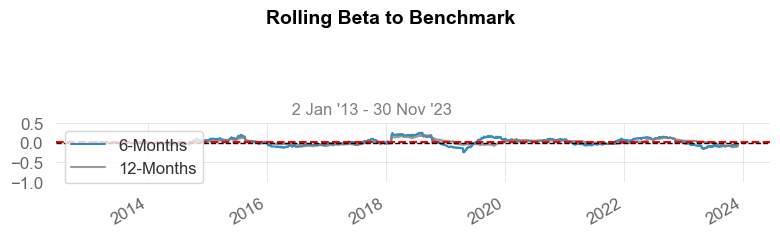

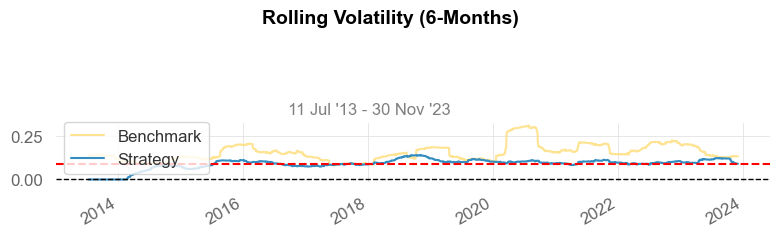

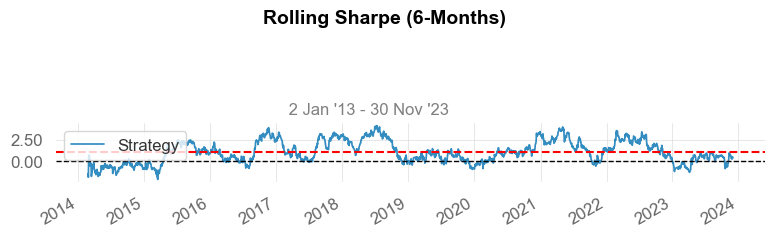

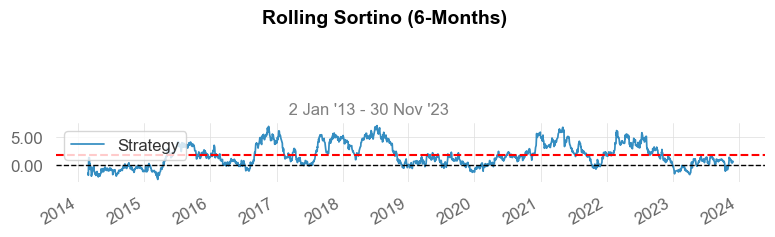

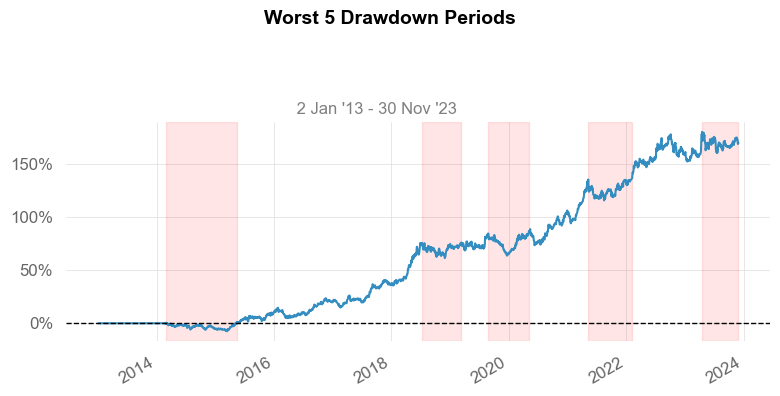

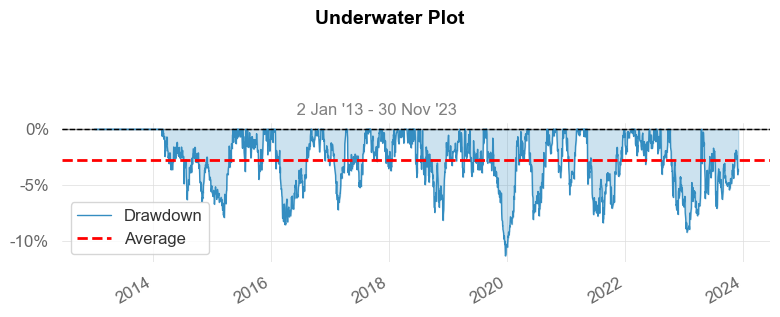

TypeError: pivot() takes 1 positional argument but 4 were given

In [13]:
correlation = daily_returns_L.loc[start_time:end_time].corr(daily_returns_S.loc[start_time:end_time])
print("Correlation:", correlation)
qs.reports.full((daily_returns_L + daily_returns_S)/2,Benchmark)

### 多空組合(只看近兩年績效,嘗試撇除前視偏誤)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2021-01-04  2021-01-04
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          32.36%      16.65%
CAGR﹪                     10.14%      5.44%

Sharpe                     1.03        0.39
Prob. Sharpe Ratio         95.76%      74.52%
Smart Sharpe               0.99        0.38
Sortino                    1.51        0.55
Smart Sortino              1.45        0.53
Sortino/√2                 1.07        0.39
Smart Sortino/√2           1.03        0.37
Omega                      1.19        1.19

Max Drawdown               -9.21%      -31.51%
Longest DD Days            272         696
Volatility (ann.)          10.17%      17.98%
R^2                        0.0         0.0
Information Ratio          0.01        0.01
Calmar                     1.1         0

/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/quantstats/utils.py:269: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  benchmark = benchmark_prices.reindex(new_index, method='bfill') \
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a s

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-10-06,2023-01-17,2023-04-18,194,-9.207277,-8.909205
2,2021-05-11,2021-08-16,2022-02-07,272,-8.353933,-7.765082
3,2023-04-19,2023-07-21,2023-11-30,225,-7.067921,-6.787785
4,2021-01-07,2021-01-21,2021-03-03,55,-5.100640,-4.345453
5,2022-08-10,2022-08-16,2022-09-21,42,-4.020924,-3.463910


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/quantstats/utils.py:269: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  benchmark = benchmark_prices.reindex(new_index, method='bfill') \


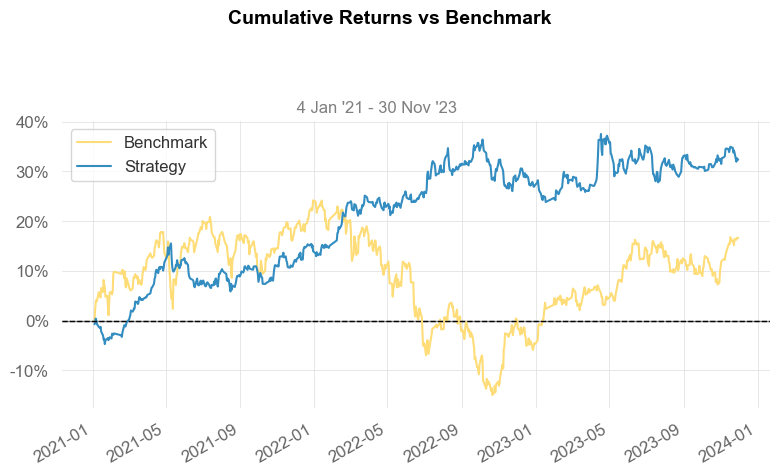

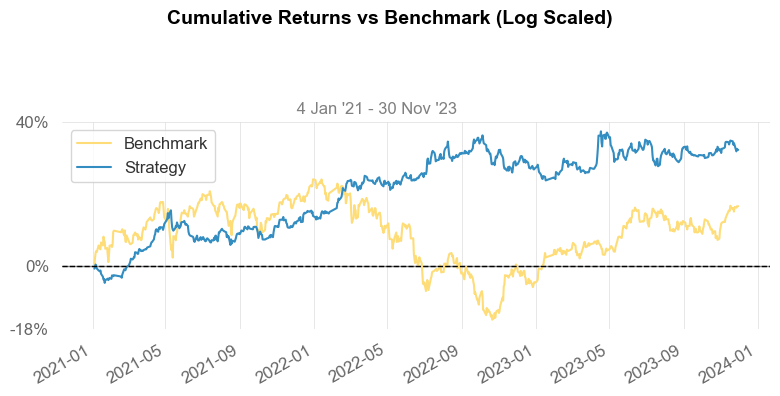

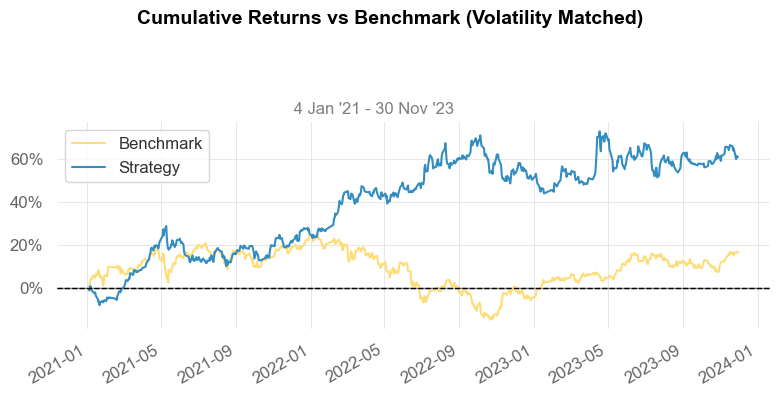

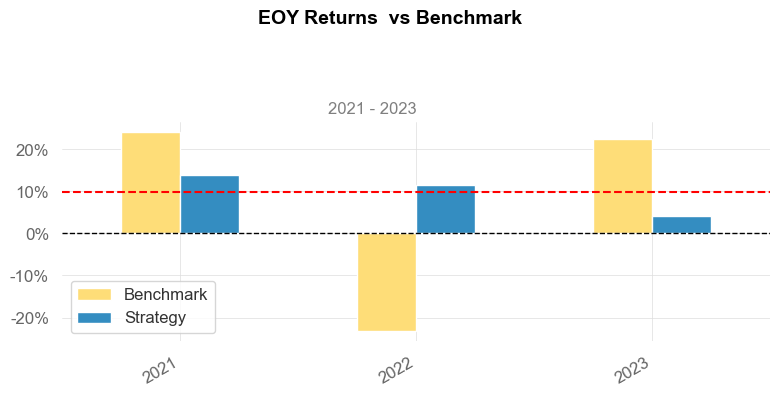

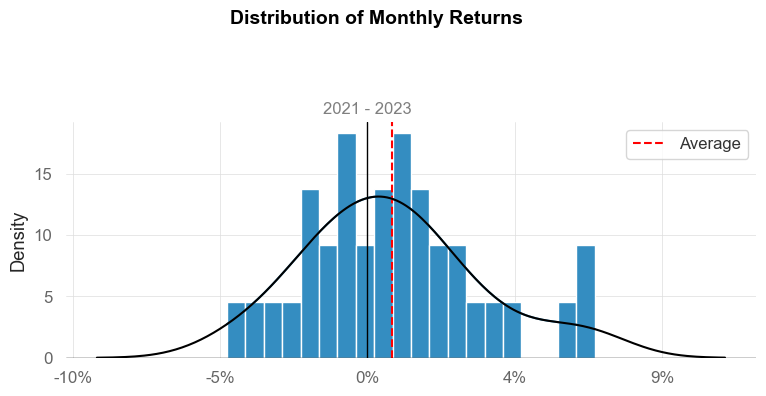

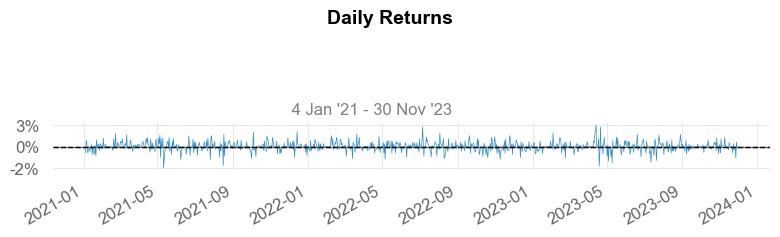

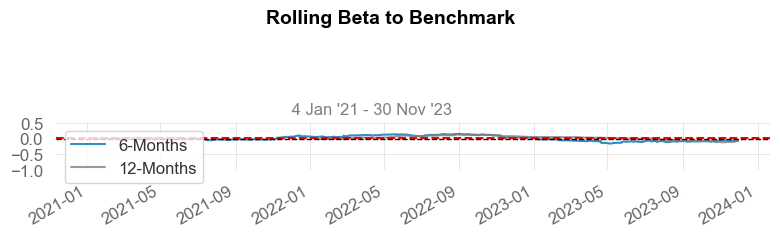

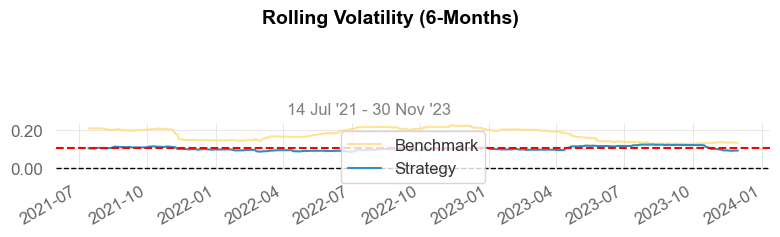

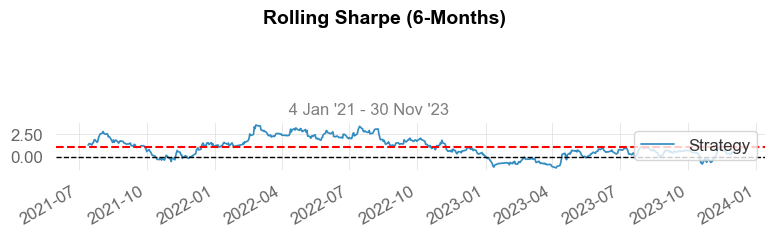

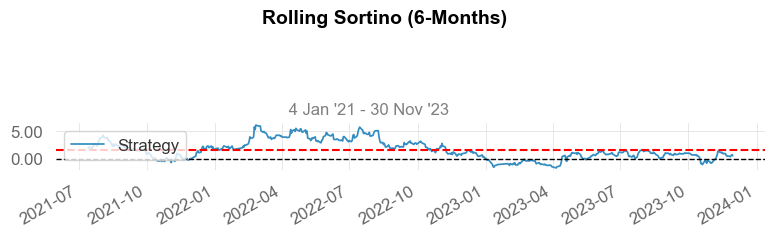

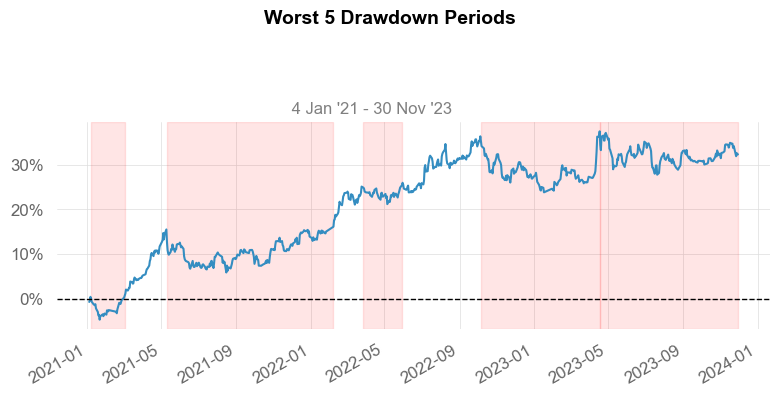

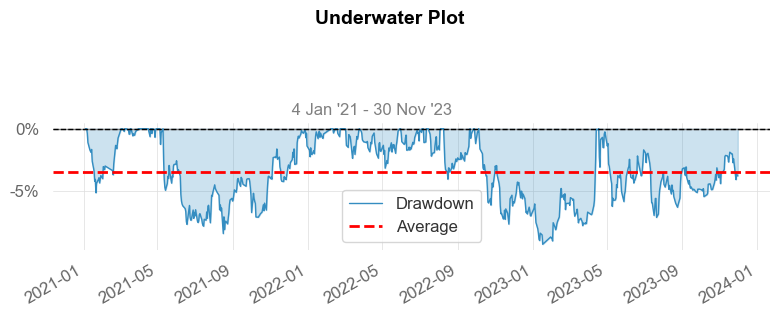

TypeError: pivot() takes 1 positional argument but 4 were given

In [14]:
start_time = '2021-01-02' # '2014-05-09'
end_time = '2023-11-30'
qs.reports.full((daily_returns_L.loc[start_time:end_time]+daily_returns_S.loc[start_time:end_time])/2,Benchmark.loc[start_time:end_time])

### 與大盤相關指標

In [ ]:
correlation = Benchmark.loc[start_time:end_time].corr(daily_returns.loc[start_time:end_time])
print("Correlation:", correlation)
volatility = daily_returns.std()
print(volatility)
volatility = Benchmark.std()
print(volatility)

0.016949107585952805
0.014870224704029749


In [ ]:
def ols_regression(X, y):
    # 為 X 增加常數列
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # 使用公式計算係數：(X'X)^(-1)X'Y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta
